# Asymptotic Concentration of Volume in Hypercubes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# We will visualise the rate of concentration as we increase dimension
dimensions = []
concentrations = []

In [3]:
def draw_histogram(n, epsilon=0.01):
    
    ax.clear()
    
    # Fix the axis for clearer effect
    ax.set_xlim([0.48, 0.68])
    ax.set_ylim([0, 150])
    
    # Title
    ax.text(0, 1.025, 'Asymptotic Concentration of Volume in Hypercubes',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    # Author
    ax.text(0.99, 0.945, '@delacruz', transform=ax.transAxes, ha='right',
            color='#777777', size = 25, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    ## Sampling and recording magnitudes
    
    points_distance = []

    for i in range(10**4):
        # Randomly sample a point from the n-Cube
        point = np.random.uniform(-1,1,n)
        # Compute its magnitude
        distance = np.linalg.norm(point)
        # Record this magnitude
        points_distance.append(distance)
        
    # Computes the proportion that falls inside epsilon band
    count = 0
    for point in points_distance:
        if (1-epsilon)*(n/3)**0.5 < point <(1+epsilon)*(n/3)**0.5:
            count += 1
    
    concentration = count / len(points_distance)
                                
    # Data for rate of convergence of concentration
    concentrations.append(concentration)
    dimensions.append(n)
            
    # Normalise magnitudes for a better plot
    points_distance = [point / (n**0.5) for point in points_distance]

    # Visualise the data into a histogram
    ax.hist(points_distance, bins = 50, density = True, color='indigo')

    # Plot the boundaries of the epsilon band
    ax.axvline((1-epsilon)*(1/3)**0.5, linestyle = '--', color = 'gold')
    ax.axvline((1+epsilon)*(1/3)**0.5, linestyle = '--', color = 'gold')
    
    # Tells us what dimension we are in
    ax.text(0.88, 0.75, f'n={n}', transform=ax.transAxes, color='#777777', size=40, ha='right', weight=800)
    
    # Tell us how many points are inside the epsilon band
    ax.text(0.91, 0.7, f'Concentration={100 * count / len(points_distance)}%', transform=ax.transAxes, 
            color='#777777', size=15, ha='right', weight=800)
    
    # Tell us how many points are inside the epsilon band
    ax.text(0.87, 0.65, f'epsilon={epsilon}', transform=ax.transAxes, color='#777777', size=15, ha='right', weight=800)

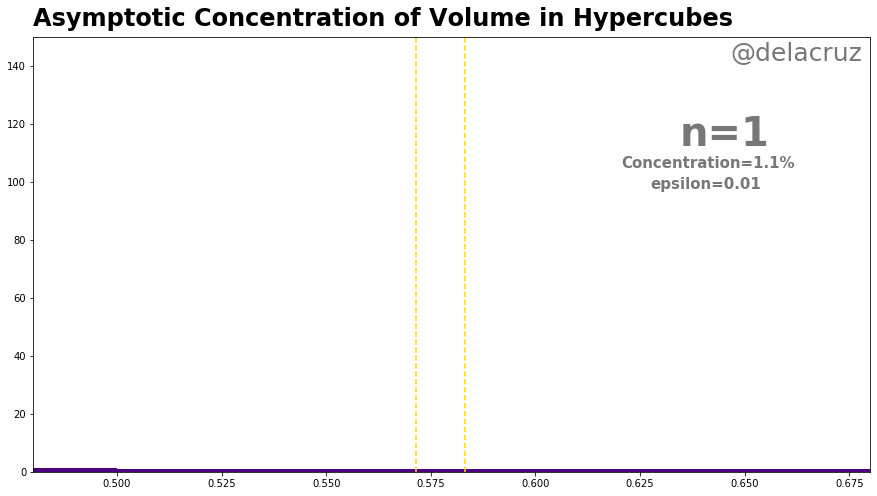

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_histogram, frames=range(1,3000,10)) 

In [8]:
# To save as an MP4 we must run this line
HTML(animator.save('Asymptotic Concentration of Volume in Hypercubes.mp4'))

<IPython.core.display.HTML object>

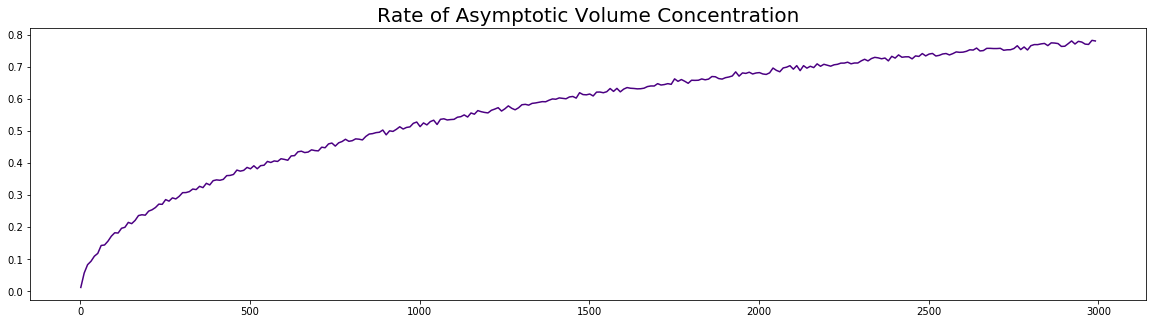

In [9]:
plt.figure(figsize = (20, 5))
plt.plot(dimensions[2:], concentrations[2:], color = 'indigo')
plt.title('Rate of Asymptotic Volume Concentration', size=20);

Using the naive interpretation of probability we can see $\mathbb{P}$ as giving us the proportion of points that fall inside the $\varepsilon$-band. But theoretically we know it converges to 1 - no matter how slow.

Recall that we bounded the probability with the following:

Let $S_n := X_1^2 + \dots X_n^2$ (and by direct computation $\mathbb{E}(X_i^2)=1/3$). Note: $A\subseteq B\Rightarrow \mathbb{P}(A) \le \mathbb{P}(B) $
$$\left|\sqrt{\frac{3S_n}{n}}-1\right|= \left|\frac{\frac{3S_n}{n}-1}{\sqrt{\frac{3S_n}{n}}+1}\right| \le \left|\frac{3S_n}{n}-1\right| < \varepsilon
\, \Rightarrow \,
\mathbb{P}\left(\left|\frac{3S_n}{n}-1\right| < \varepsilon\right) \le \mathbb{P}\left(\left|\sqrt{\frac{3S_n}{n}}-1\right|< \varepsilon\right) \le 1$$

We know using Chebyshev's Inequality that
$$\mathbb{P}\left(\left|\frac{3S_n}{n}-1\right| \ge \varepsilon\right) \le \frac{1}{\varepsilon^2}\mathrm{Var}\left(\frac{3S_n}{n}\right) = \frac{9}{n^2\varepsilon^2}\mathrm{Var}(S_n) $$

Note that as $\{X_i\}$ are i.i.d $\{X_i^2\}$ are also i.i.d which tells us that:
$$\mathrm{Var}(S_n) = \mathrm{Var}(X_1^2 + \dots X_n^2) = n \mathrm{Var}(X^2)$$

And by computation (via LOTUS):
$$\mathrm{Var}(X^2)=\mathbb{E}[(X^2-\mathbb{E}(X^2))^2]=\int_{-1}^{1} \left(x^2-\frac{1}{3}\right)^2 \cdot \frac{1}{2} \, dx = \frac{4}{45}$$

Hence:
$$ \frac{9}{n^2\varepsilon^2}\mathrm{Var}(S_n) = \frac{9}{n^2\varepsilon^2}\cdot n \cdot \frac{4}{45} = \frac{4}{5n\varepsilon^2} $$

Therefore:
$$
1 - \frac{4}{5n\varepsilon^2} \le \mathbb{P}\left(\left|\frac{3S_n}{n}-1\right| < \varepsilon\right) \le \mathbb{P}\left(\left|\sqrt{\frac{3S_n}{n}}-1\right|< \varepsilon\right) \le 1
$$

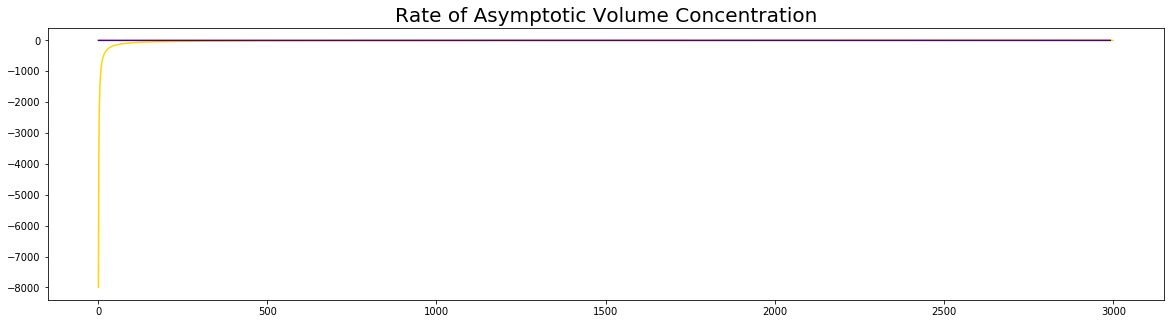

In [10]:
plt.figure(figsize = (20, 5))

n = np.arange(1, 3000)
epsilon = 0.01
lowerbound = 1 - 4/(5*n*(epsilon**2))
plt.plot(n, lowerbound, color = 'gold')

plt.plot(dimensions[2:], concentrations[2:], color = 'indigo')
plt.title('Rate of Asymptotic Volume Concentration', size=20);

We have clearly obtained quite a crude lower bound but it is quite clear that this lower bound does go to 1 no matter how slow. The proportion of points that fall inside the epsilon band is bounded by 1 and so must converge to 1.